In [24]:
#IMPORTING MODULES,FILTERING WARNINGS

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
#LOADING THE DATASET

fakejobs_df = pd.read_csv('https://raw.githubusercontent.com/karennjoki/SCAMP-Cohort6-/master/intermediate/fake_job_postings.csv')
fakejobs_df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
7441,7442,Growth Hacker,"US, CA, Menlo Park",Engineering,NaN,Transifex was founded in 2009 with the dream t...,"At Transifex, we understand that coding and te...",Tons of experience in user acquisition across ...,"About TransifexTransifex, Inc. is a Menlo Park...",0,0,1,NaN,NaN,NaN,NaN,NaN,0
9753,9754,Property Preservation Field Crews,"US, MD, Bowie",NaN,NaN,NaN,We are looking for a contractors/individual wh...,**NOTE: You must have the necessary tools for...,As per job,0,0,0,Contract,NaN,NaN,Real Estate,NaN,1
2814,2815,Class A OTR Driver Home Every W/End,"US, TN, Nashville",Transportation,49000-58000,"Expedited Recruiting, LLC is a transportion re...",Nashville based family owned and operated (for...,Qualifications You must have at least on year ...,Offering: Starting pay for those with under 5 ...,0,1,1,Full-time,Not Applicable,Unspecified,Transportation/Trucking/Railroad,Other,0
9417,9418,Outside Sales Representative,"US, WI, Milwaukee",NaN,NaN,Schroeder Solutions is a full-service interior...,Schroeder Solutions is a full-service interior...,2-3 years sales experienceDemonstrated aptitud...,Schroeder Solutions offers a competitive salar...,0,1,1,Full-time,NaN,NaN,NaN,NaN,0
7003,7004,Network Engineer,"US, CO, Colorado Springs",NaN,NaN,NaN,"Mastech, a growing company dedicated to innova...",NaN,NaN,0,0,0,Contract,Mid-Senior level,Bachelor's Degree,Telecommunications,Engineering,0


In [26]:
#EXPLORING THE DATASET
fakejobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [27]:
#GETTING THE STATISTICAL DESCRIPTION OF THE DATASET
fakejobs_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#FINDING THE NUMBER OF NULL VALUES PER COLUMN

fakejobs_df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

**DATA CLEANING**

In [29]:
#DROPPING ALL ROW ENTRIES WITH NULL VALUE IN THE INDUSTRY COLUMN

newfakejob_df = fakejobs_df.dropna(subset = ['industry'])

newfakejob_df['industry'].isna().sum()


0

In [30]:
#ENTRIES REMAINING AFTER DROPPING ROWS WITH EMPTY VALUE IN INDUSTRY COLUMN
newfakejob_df['industry'].count()


12977

In [31]:
#UNIQUE VALUES/ENTRIES IN THE INDUSTRY COLUMN
len(pd.unique(newfakejob_df['industry']))

131

In [32]:
#NEW DF WITH ONLY FRAUDLENT CASES(1)

industry_df = newfakejob_df[newfakejob_df['fraudulent'] == 1]
industry_df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
357,358,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,NaN,1
493,494,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1


In [33]:
#COUNT OF UNIQUE VALUES

industry_df['industry'].value_counts()
len(industry_df.industry.unique())


62

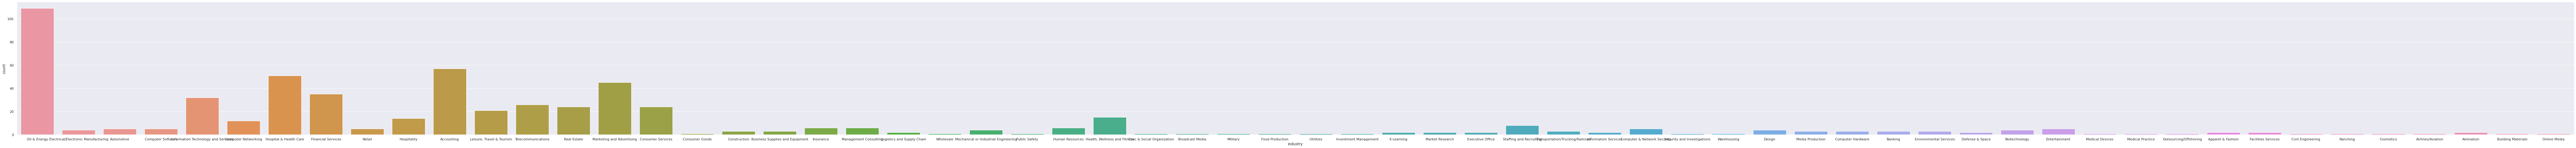

In [34]:
#VISUALIZATION(Click Graph to view clearly)

sns.set_theme(style="darkgrid")

plt.figure(figsize=(150,8))
ax = sns.countplot(x="industry", data=industry_df)

In [35]:
 #GROUPING INDUSTRIES BY COUNT IN DESCENDING ORDER
 
industry_df.groupby('industry')['industry'].count().reset_index(name = 'Count').sort_values(['Count'],ascending = False)


,industry,Count
48,Oil & Energy,109
0,Accounting,57
31,Hospital & Health Care,51
42,Marketing and Advertising,45
28,Financial Services,35
...,...,...
46,Medical Practice,1
45,Medical Devices,1
29,Food Production,1
1,Airlines/Aviation,1


Hence from the analysis above **Oil&Energy** industry had the highest number of fake job cases having a **count of 109**